Using tar storage for T=1.0: /home/bh692/scratch_pi_co54/bh692/results/20260113_test_area_with_num_tri_types/T_1.0.tar
Found 41 CSV files
Saving analysis to /home/bh692/scratch_pi_co54/bh692/results/20260113_test_area_with_num_tri_types/T_1.0_analysis/data_analysis
Summary of per-lambda statistics:


,lambda_deform,partial_U_mean,partial_U_sem,Ly_mean,n_samples,csv_path,L_tot
0,0.000,-0.935071,5.748650,106.666667,4000,./T_1.0/lambda_0.000000/sample_csv/U_K_tot_log...,370.945414
1,0.025,2.972247,5.567910,106.267416,4000,./T_1.0/lambda_0.025000/sample_csv/U_K_tot_log...,404.427565
2,0.050,2.822369,5.579833,105.869660,4000,./T_1.0/lambda_0.050000/sample_csv/U_K_tot_log...,374.715859
3,0.075,2.083075,5.549273,105.473392,4000,./T_1.0/lambda_0.075000/sample_csv/U_K_tot_log...,359.405320
4,0.100,-1.867415,5.616857,105.078607,4000,./T_1.0/lambda_0.100000/sample_csv/U_K_tot_log...,365.844855
5,0.125,-6.324677,5.537722,104.685300,4000,./T_1.0/lambda_0.125000/sample_csv/U_K_tot_log...,341.349448
6,0.150,3.535157,5.614709,104.293466,4000,./T_1.0/lambda_0.150000/sample_csv/U_K_tot_log...,398.843805
7,0.175,-6.451036,5.568722,103.903098,4000,./T_1.0/lambda_0.175000/sample_csv/U_K_tot_log...,351.508530
8,0.200,-3.968838,5.699899,103.514191,4000,./T_1.0/lambda_0.200000/sample_csv/U_K_tot_log...,380.402114
9,0.225,-1.786272,5.564149,103.126739,4000,./T_1.0/lambda_0.225000/sample_csv/U_K_tot_log...,356.487782


Linear fit: delta F = 2 * gamma * delta Ly + intercept (weighted)
gamma = 0.0382524 ± 0.6981, intercept = 0.17048


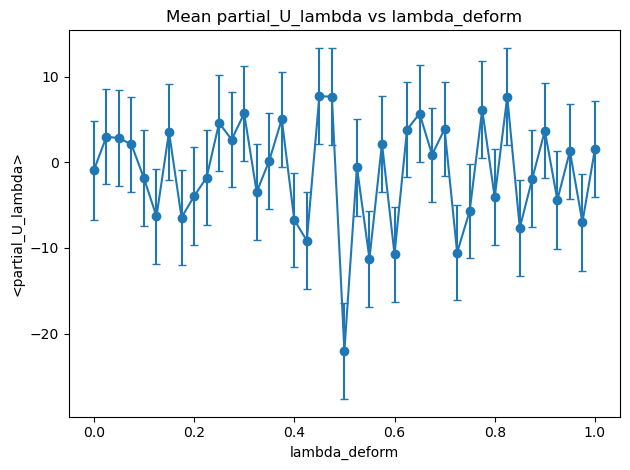

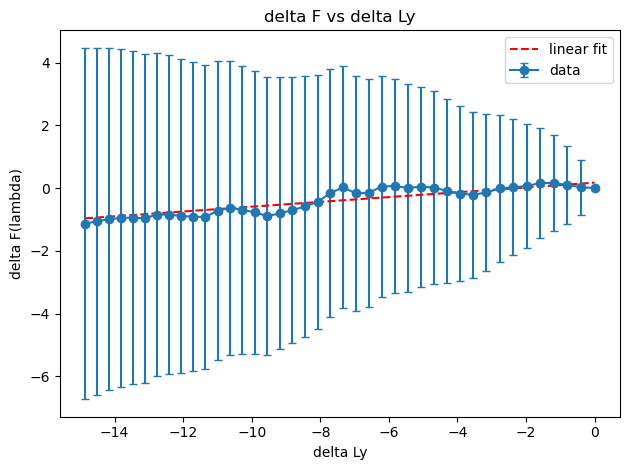

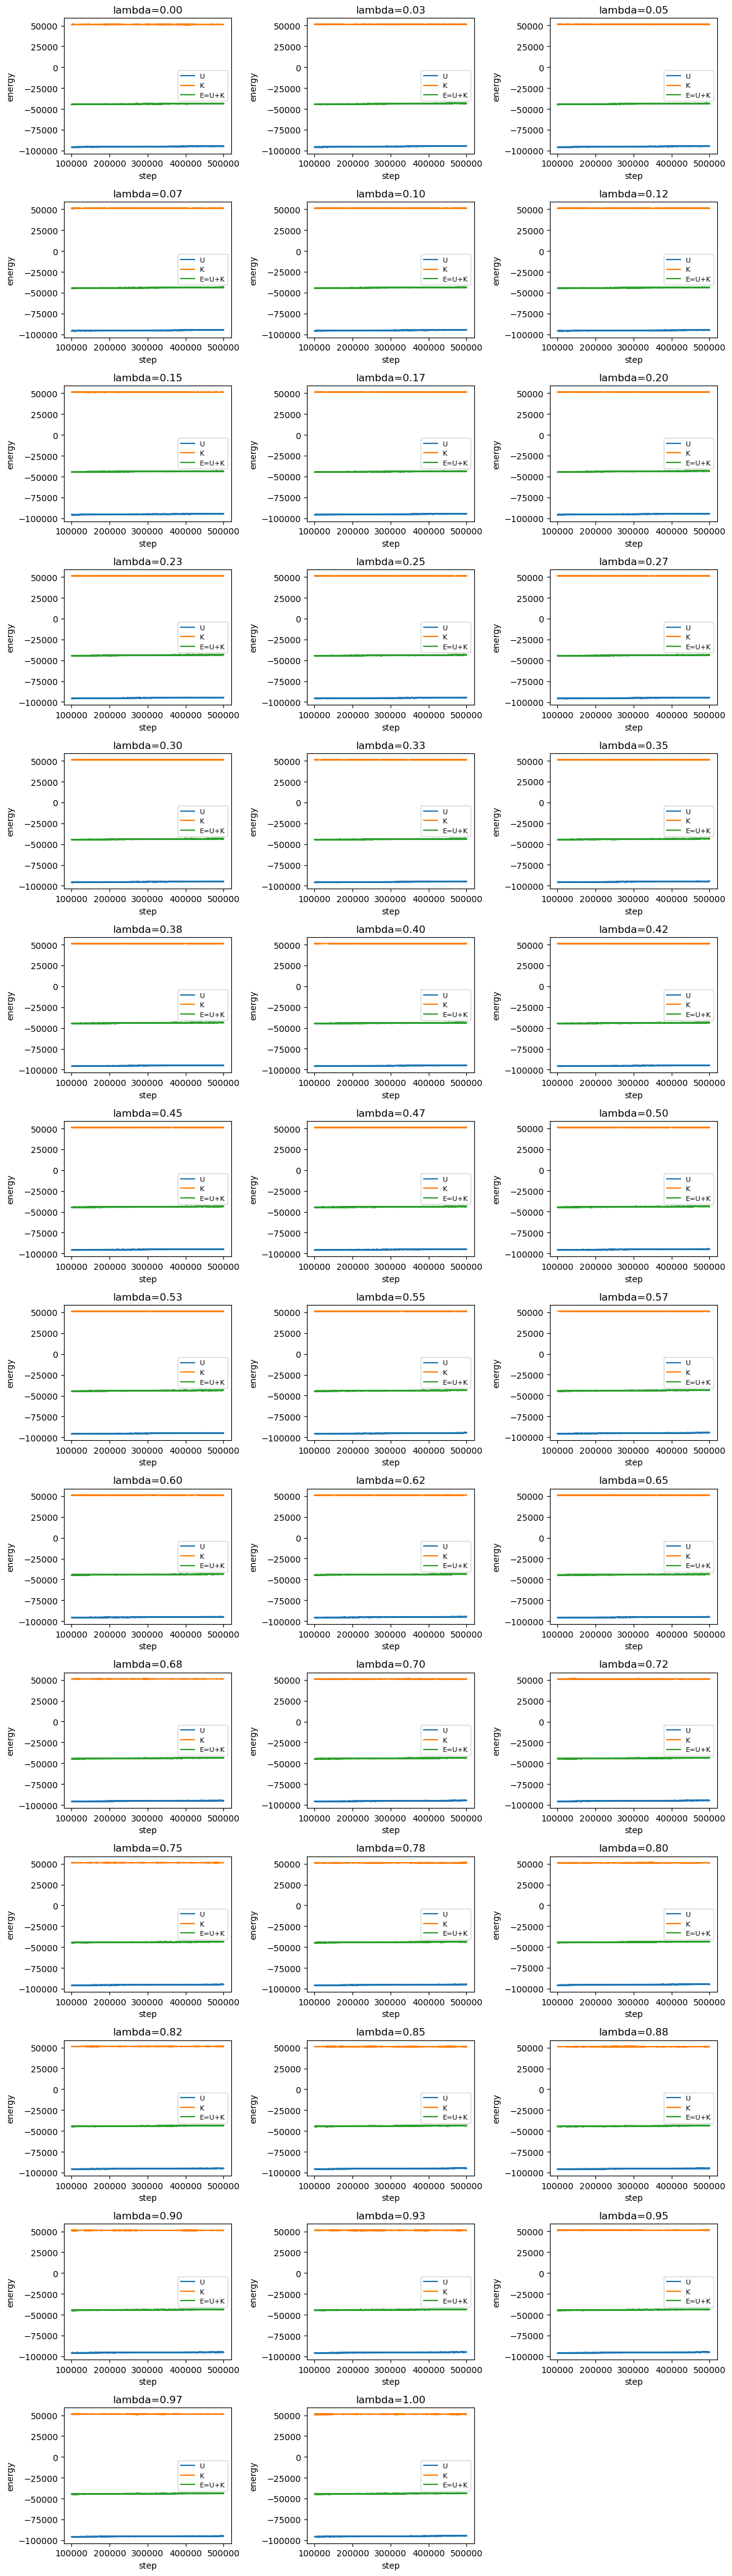

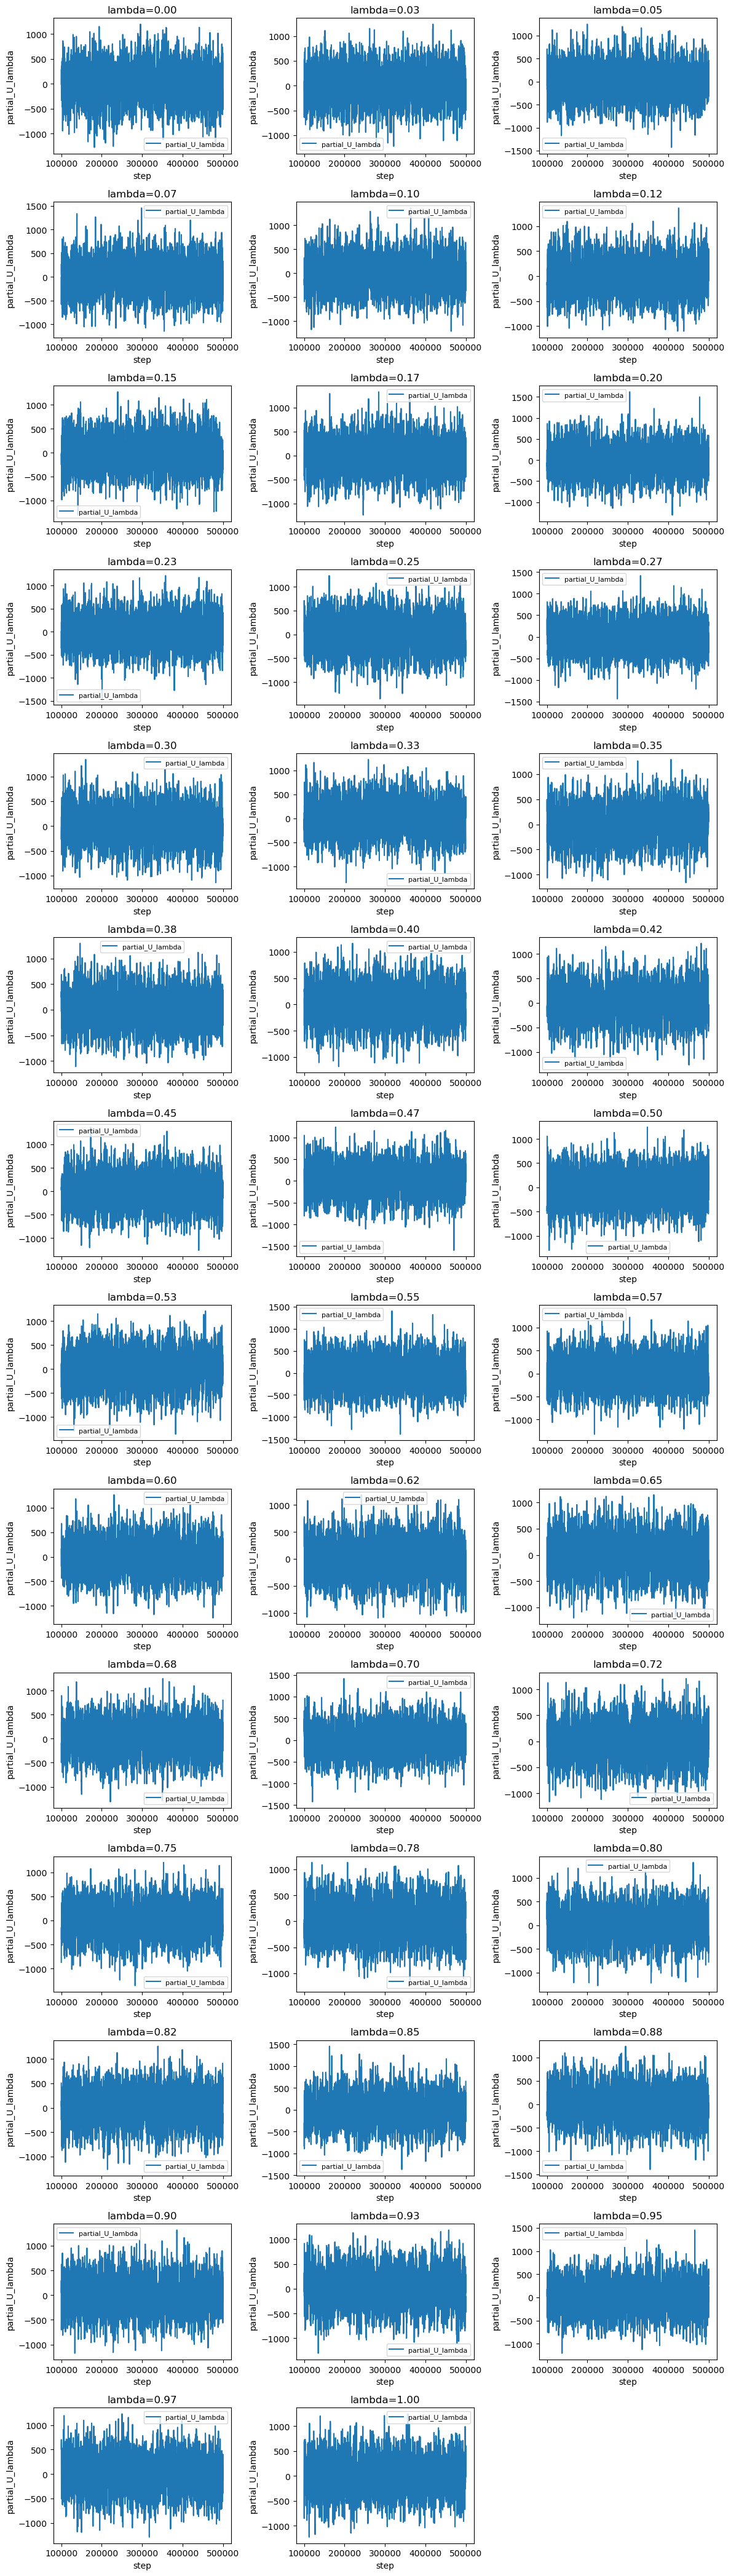

In [ ]:
# Analysis of partial_U_lambda series

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from contextlib import contextmanager
import fnmatch
import io
import tarfile

RUN_ROOT_NAME = "/home/bh692/scratch_pi_co54/bh692/results/20260113_test_area_with_num_tri_types"


def find_run_root():
    rel = Path(RUN_ROOT_NAME)
    cwd = Path.cwd()
    for parent in [cwd] + list(cwd.parents):
        candidate = parent / rel
        if candidate.exists():
            return candidate
    raise RuntimeError(f"Could not find RUN_ROOT {rel} starting from {cwd}")


RUN_ROOT = find_run_root()


class TStorage:
    def __init__(self, T_value):
        self.T_value = T_value
        self.dir_path = RUN_ROOT / f"T_{T_value}"
        self.tar_path = RUN_ROOT / f"T_{T_value}.tar"
        self.tar = None
        if self.dir_path.exists():
            self.kind = "dir"
            self.base_root = self.dir_path
        elif self.tar_path.exists():
            self.kind = "tar"
            self.tar = tarfile.open(self.tar_path, "r")
            self.base_root = f"T_{T_value}"
        else:
            raise RuntimeError(f"Could not find directory or tar for T={T_value} under {RUN_ROOT}")
        self.output_dir = (self.dir_path / "data_analysis") if self.kind == "dir" else (RUN_ROOT / f"T_{T_value}_analysis" / "data_analysis")

    def close(self):
        if self.tar is not None:
            self.tar.close()

    def __enter__(self):
        return self

    def __exit__(self, exc_type, exc, tb):
        self.close()

    def member_name(self, member):
        return member.name if hasattr(member, "name") else str(member)

    def lambda_label(self, member):
        for part in Path(self.member_name(member)).parts:
            if part.startswith("lambda_"):
                return part.split("lambda_")[1]
        return "unknown"

    def lambda_value(self, member):
        label = self.lambda_label(member)
        try:
            return float(label)
        except Exception:
            return float("nan")

    def iter_members(self, pattern: str):
        if self.kind == "dir":
            yield from self.base_root.glob(pattern)
        else:
            full_pattern = f"{self.base_root}/{pattern}"
            prefixed_pattern = f"./{full_pattern}"
            stripped_pattern = full_pattern.lstrip("./")
            for m in self.tar.getmembers():
                if not m.isfile():
                    continue
                name = m.name
                name_stripped = name.lstrip("./")
                if (
                    fnmatch.fnmatch(name, full_pattern)
                    or fnmatch.fnmatch(name, prefixed_pattern)
                    or fnmatch.fnmatch(name_stripped, stripped_pattern)
                ):
                    yield m

    def read_csv(self, member, **kwargs):
        if self.kind == "dir":
            return pd.read_csv(member, **kwargs)
        fileobj = self.tar.extractfile(member)
        if fileobj is None:
            raise FileNotFoundError(self.member_name(member))
        text_stream = io.TextIOWrapper(fileobj, encoding=kwargs.pop("encoding", "utf-8"))
        return pd.read_csv(text_stream, **kwargs)

    @contextmanager
    def open_text(self, member, encoding: str = "utf-8"):
        if self.kind == "dir":
            with Path(member).open("r", encoding=encoding) as handle:
                yield handle
        else:
            fileobj = self.tar.extractfile(member)
            if fileobj is None:
                raise FileNotFoundError(self.member_name(member))
            with io.TextIOWrapper(fileobj, encoding=encoding) as handle:
                yield handle


def list_lambda_files(storage: TStorage, relative_pattern: str):
    mapping = {}
    pattern = f"lambda_*/{relative_pattern}"
    for member in storage.iter_members(pattern):
        label = storage.lambda_label(member)
        mapping.setdefault(label, []).append(member)
    return mapping


def row_to_map(row):
    # Convert alternating name,value,... row into a dict.
    vals = [v for v in row.tolist() if pd.notna(v)]
    mapping = {}
    for i in range(0, len(vals) - 1, 2):
        key = str(vals[i]).strip()
        if not key:
            continue
        mapping[key] = vals[i + 1]
    return mapping

# Locate base storage containing the lambda subfolders without extracting the tar
# T_value_primary = 1.0
with TStorage(T_value_primary) as storage:
    csv_members = sorted(
        storage.iter_members("lambda_*/sample_csv/U_K_tot_log.csv"),
        key=lambda m: storage.member_name(m),
    )
    print(
        f"Using {storage.kind} storage for T={T_value_primary}: "
        f"{storage.dir_path if storage.kind == 'dir' else storage.tar_path}"
    )
    print(f"Found {len(csv_members)} CSV files")

    output_dir = storage.output_dir
    output_dir.mkdir(parents=True, exist_ok=True)
    print(f"Saving analysis to {output_dir}")

    records = []
    timeseries = []
    for csv_member in csv_members:
        # Each line is: name, value, name, value, ... possibly with extra fields (e.g., L_tot)
        df_raw = storage.read_csv(csv_member, header=None, skipinitialspace=True)

        row_maps = df_raw.apply(row_to_map, axis=1)
        df_kv = pd.DataFrame(list(row_maps))

        if "step" not in df_kv:
            print(f"Skipping {storage.member_name(csv_member)} (no 'step' column)")
            continue

        steps = pd.to_numeric(df_kv["step"], errors="coerce")
        mask = steps >= 100000
        if not mask.any():
            print(f"Skipping {storage.member_name(csv_member)} (no data with step >= 100000)")
            continue

        df_sel = df_kv.loc[mask].copy()

        def col(name):
            return pd.to_numeric(df_sel.get(name, pd.Series(dtype=float)), errors="coerce").to_numpy()

        step = col("step")
        u_tot = col("U_tot")
        k_tot = col("K_tot")
        partial_u = col("partial_U_lambda")
        ly = col("Ly")
        lam = col("lambda_deform")
        l_tot = col("L_tot") if "L_tot" in df_sel else None

        lam_mean = np.nanmean(lam)
        partial_mean = np.nanmean(partial_u)
        partial_std = np.nanstd(partial_u, ddof=1) if np.count_nonzero(~np.isnan(partial_u)) > 1 else np.nan
        n = np.count_nonzero(~np.isnan(partial_u))
        partial_sem = partial_std / np.sqrt(n) if n > 0 and np.isfinite(partial_std) else np.nan
        ly_mean = np.nanmean(ly)

        rec = {
            "lambda_deform": lam_mean,
            "partial_U_mean": partial_mean,
            "partial_U_sem": partial_sem,
            "Ly_mean": ly_mean,
            "n_samples": int(n),
            "csv_path": storage.member_name(csv_member),
        }
        if l_tot is not None:
            l_tot_mean = np.nanmean(l_tot)
            rec["L_tot"] = float(l_tot_mean) if np.isfinite(l_tot_mean) else np.nan
        records.append(rec)

        ts_entry = {
            "lambda_deform": lam_mean,
            "step": step,
            "U_tot": u_tot,
            "K_tot": k_tot,
            "partial_U_lambda": partial_u,
        }
        if l_tot is not None:
            ts_entry["L_tot"] = l_tot
        timeseries.append(ts_entry)

if not csv_members:
    raise RuntimeError(f"No CSV files found for T={T_value_primary}. Check paths and storage.")
if not records:
    raise RuntimeError("No usable data found (all files filtered out by step >= 100000)")

summary = pd.DataFrame(records).sort_values("lambda_deform").reset_index(drop=True)
print("Summary of per-lambda statistics:")
display(summary)
summary.to_csv(output_dir / "summary_partial_U_lambda.csv", index=False)

lam = summary["lambda_deform"].to_numpy()
partial_mean = summary["partial_U_mean"].to_numpy()
partial_sem = summary["partial_U_sem"].to_numpy()
ly_mean = summary["Ly_mean"].to_numpy()
delta_ly = ly_mean - ly_mean[0]  # reference at smallest lambda (typically lambda=0)

# --- Fig 1: <partial_U_lambda> vs lambda_deform ---
fig1, ax1 = plt.subplots()
ax1.errorbar(lam, partial_mean, yerr=partial_sem, fmt="o-", capsize=3)
ax1.set_xlabel("lambda_deform")
ax1.set_ylabel("<partial_U_lambda>")
ax1.set_title("Mean partial_U_lambda vs lambda_deform")
fig1.tight_layout()
fig1.savefig(output_dir / "fig1_partialU_vs_lambda.png", dpi=300)

# --- Delta F(lambda) via trapezoidal integration ---
dlam = np.diff(lam)
segment_contrib = 0.5 * dlam * (partial_mean[:-1] + partial_mean[1:])
delta_f = np.zeros_like(lam)
delta_f[1:] = np.cumsum(segment_contrib)

# Error propagation for delta F using per-lambda Var(<partial_U_lambda>)
var_partial = partial_sem ** 2
delta_f_var = np.zeros_like(lam)
delta_f_var[1:] = np.cumsum(dlam * var_partial[1:])
delta_f_err = np.sqrt(delta_f_var)

# --- Linear regression: delta F vs delta Ly (weighted by delta_F_err) ---
mask_fit = (
    np.isfinite(delta_ly)
    & np.isfinite(delta_f)
    & np.isfinite(delta_f_err)
    & (delta_f_err > 0.0)
)
x = delta_ly[mask_fit]
y = delta_f[mask_fit]
sigma_y = delta_f_err[mask_fit]
w_reg = 1.0 / (sigma_y ** 2)
w_sum = np.sum(w_reg)
x_w = np.sum(w_reg * x) / w_sum
y_w = np.sum(w_reg * y) / w_sum
x_c = x - x_w
y_c = y - y_w
S_xx = np.sum(w_reg * x_c ** 2)
S_xy = np.sum(w_reg * x_c * y_c)
slope = S_xy / S_xx
intercept = y_w - slope * x_w
gamma = slope / 2.0

# --- Variance of gamma via Delta F error propagation ---
Ly_vals = ly_mean[mask_fit]
DeltaF_vals = y  # delta_f[mask_fit]
DeltaF_var_vals = delta_f_var[mask_fit]

Ly_mean = np.nanmean(Ly_vals)
DeltaF_mean = np.nanmean(DeltaF_vals)
dLy = Ly_vals - Ly_mean
dF = DeltaF_vals - DeltaF_mean
S_FF = np.sum(dF ** 2)
S_LyLy = np.sum(dLy ** 2)
prefactor = 0.5 / np.sqrt(S_FF * S_LyLy)
d_gamma_dF = prefactor * (dLy * (1.0 - (dF ** 2) / S_FF))
var_gamma = float(np.sum((d_gamma_dF ** 2) * DeltaF_var_vals))
gamma_err = float(np.sqrt(var_gamma))
print("Linear fit: delta F = 2 * gamma * delta Ly + intercept (weighted)")
print(f"gamma = {gamma:.6g} ± {gamma_err:.6g}, intercept = {intercept:.6g}")
fit_df = pd.DataFrame({
    "delta_Ly": delta_ly[mask_fit],
    "delta_F": delta_f[mask_fit],
    "delta_F_err": delta_f_err[mask_fit],
    "delta_F_fit": slope * delta_ly[mask_fit] + intercept,
})
fit_df.to_csv(output_dir / "deltaF_vs_deltaLy_fit.csv", index=False)
gamma_df = pd.DataFrame({
    "gamma": [gamma],
    "gamma_err": [gamma_err],
    "intercept": [intercept],
})
gamma_df.to_csv(output_dir / "gamma_fit_params.csv", index=False)
x_fit = np.linspace(delta_ly.min(), delta_ly.max(), 100)
y_fit = slope * x_fit + intercept

# --- Fig 2: delta F vs delta Ly ---
fig2, ax2 = plt.subplots()
ax2.errorbar(delta_ly, delta_f, yerr=delta_f_err, fmt="o-", capsize=3, label="data")
ax2.plot(x_fit, y_fit, "r--", label="linear fit")
ax2.set_xlabel("delta Ly")
ax2.set_ylabel("delta F(lambda)")
ax2.set_title("delta F vs delta Ly")
ax2.legend()
fig2.tight_layout()
fig2.savefig(output_dir / "fig2_deltaF_vs_deltaLy.png", dpi=300)

# --- Fig 3: U, K, E vs step for each lambda ---
n = len(timeseries)
ncols = 3
nrows = int(np.ceil(n / ncols))
fig3, axes3 = plt.subplots(nrows, ncols, figsize=(4 * ncols, 3 * nrows), sharex=False, sharey=False)
axes3 = np.atleast_1d(axes3).ravel()
for i, ts in enumerate(timeseries):
    ax = axes3[i]
    step = ts["step"]
    u_tot = ts["U_tot"]
    k_tot = ts["K_tot"]
    e_tot = u_tot + k_tot
    lam_val = ts["lambda_deform"]
    ax.plot(step, u_tot, label="U")
    ax.plot(step, k_tot, label="K")
    ax.plot(step, e_tot, label="E=U+K")
    ax.set_title(f"lambda={lam_val:.2f}")
    ax.set_xlabel("step")
    ax.set_ylabel("energy")
    ax.legend(fontsize=8)

for ax in axes3[len(timeseries):]:
    ax.axis("off")

fig3.tight_layout()
fig3.savefig(output_dir / "fig3_U_K_E_vs_step.png", dpi=300)

# --- Fig 4: partial_U_lambda vs step for each lambda ---
fig4, axes4 = plt.subplots(nrows, ncols, figsize=(4 * ncols, 3 * nrows), sharex=False, sharey=False)
axes4 = np.atleast_1d(axes4).ravel()
for i, ts in enumerate(timeseries):
    ax = axes4[i]
    step = ts["step"]
    partial_u = ts["partial_U_lambda"]
    lam_val = ts["lambda_deform"]
    ax.plot(step, partial_u, label="partial_U_lambda")
    ax.set_title(f"lambda={lam_val:.2f}")
    ax.set_xlabel("step")
    ax.set_ylabel("partial_U_lambda")
    ax.legend(fontsize=8)

for ax in axes4[len(timeseries):]:
    ax.axis("off")

fig4.tight_layout()
fig4.savefig(output_dir / "fig4_partialU_vs_step.png", dpi=300)

plt.show()




Linear fit using mean AB_pair_length (weighted):
delta F = gamma * <AB_pair_length> + intercept
gamma = 0.00120344 ± 0.0034475, intercept = -2.02196


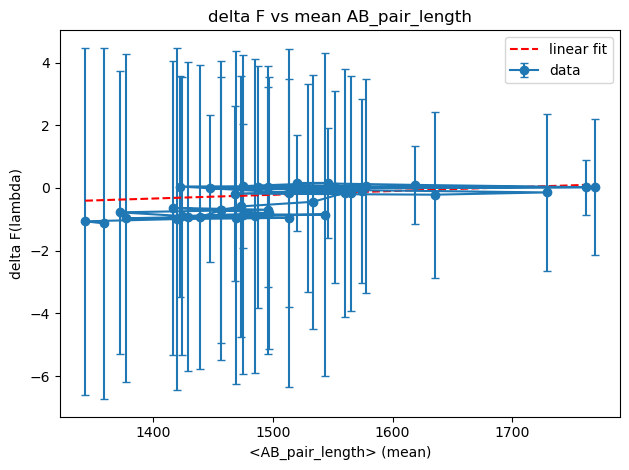

In [2]:
# --- Linear regression: delta F vs mean AB_pair_length from ab_pair_length_log.csv (weighted by delta_F_err) ---

# Use AB pair lengths from the ab_pair_length_log.csv files under storage instead of L_tot.
if 'summary' not in globals():
    raise RuntimeError("summary is not defined; run the first cell to set it.")

ab_length_by_lambda = {}
T_value_ab = T_value_primary
with TStorage(T_value_ab) as storage:
    for ab_member in storage.iter_members("lambda_*/sample_csv/ab_pair_length_log.csv"):
        lam_val = storage.lambda_value(ab_member)
        df_ab = storage.read_csv(ab_member)
        if "AB_pair_length" not in df_ab:
            continue

        ab_mean = pd.to_numeric(df_ab["AB_pair_length"], errors="coerce").mean()
        if np.isfinite(ab_mean):
            ab_length_by_lambda[round(lam_val, 6)] = ab_mean

ab_mean_values = []
for lam_val in summary["lambda_deform"].to_numpy():
    lam_key = round(float(lam_val), 6)
    ab_mean_values.append(ab_length_by_lambda.get(lam_key, np.nan))
ab_mean_values = np.array(ab_mean_values, dtype=float)

if not np.isfinite(ab_mean_values).any():
    raise RuntimeError("No AB_pair_length means found for the lambdas in the summary.")

sigma_y_L = delta_f_err
mask_fit_L = (
    np.isfinite(ab_mean_values)
    & np.isfinite(delta_f)
    & np.isfinite(sigma_y_L)
    & (sigma_y_L > 0.0)
)

if mask_fit_L.sum() < 2:
    raise RuntimeError("Not enough points with AB_pair_length and delta F to fit a line.")

x_L = ab_mean_values[mask_fit_L]
y_L = delta_f[mask_fit_L]
sigma_y_L = sigma_y_L[mask_fit_L]
w_L = 1.0 / (sigma_y_L ** 2)
w_L_sum = np.sum(w_L)
x_L_w = np.sum(w_L * x_L) / w_L_sum
y_L_w = np.sum(w_L * y_L) / w_L_sum
x_L_c = x_L - x_L_w
y_L_c = y_L - y_L_w
S_xx_L = np.sum(w_L * x_L_c ** 2)
S_xy_L = np.sum(w_L * x_L_c * y_L_c)

if np.isclose(S_xx_L, 0):
    raise RuntimeError("Cannot fit line: AB_pair_length values have zero variance.")

gamma_L = S_xy_L / S_xx_L
intercept_L = y_L_w - gamma_L * x_L_w
var_gamma_L = 1.0 / S_xx_L
gamma_L_err = float(np.sqrt(var_gamma_L))

print("Linear fit using mean AB_pair_length (weighted):")
print("delta F = gamma * <AB_pair_length> + intercept")
print(f"gamma = {gamma_L:.6g} ± {gamma_L_err:.6g}, intercept = {intercept_L:.6g}")

fit_L_df = pd.DataFrame({
    "AB_pair_length_mean": ab_mean_values[mask_fit_L],
    "delta_F": delta_f[mask_fit_L],
    "delta_F_err": delta_f_err[mask_fit_L],
    "delta_F_fit": gamma_L * ab_mean_values[mask_fit_L] + intercept_L,
})
fit_L_df.to_csv(output_dir / "deltaF_vs_AB_pair_length_fit.csv", index=False)

gamma_L_df = pd.DataFrame({
    "gamma_AB_pair_length": [gamma_L],
    "gamma_AB_pair_length_err": [gamma_L_err],
    "intercept": [intercept_L],
})
gamma_L_df.to_csv(output_dir / "gamma_AB_pair_length_fit_params.csv", index=False)

# --- Plot: delta F vs mean AB_pair_length ---
x_fit_L = np.linspace(np.nanmin(ab_mean_values), np.nanmax(ab_mean_values), 100)
y_fit_L = gamma_L * x_fit_L + intercept_L

fig5, ax5 = plt.subplots()
ax5.errorbar(ab_mean_values, delta_f, yerr=delta_f_err, fmt="o-", capsize=3, label="data")
ax5.plot(x_fit_L, y_fit_L, "r--", label="linear fit")
ax5.set_xlabel("<AB_pair_length> (mean)")
ax5.set_ylabel("delta F(lambda)")
ax5.set_title("delta F vs mean AB_pair_length")
ax5.legend()
fig5.tight_layout()
fig5.savefig(output_dir / "fig5_deltaF_vs_AB_pair_length.png", dpi=300)

plt.show()



In [3]:
# --- Run average_cwa.py for each lambda: CWA analysis ---

import csv
import math
from pathlib import Path
from average_cwa import parse_row, aggregate_modes, estimate_prefactor, plot_average_cwa

# We reuse the storage helper to stream from tar without extracting.
T_value = T_value_primary
with TStorage(T_value) as storage:
    print(
        f"Reading CWA directly from {storage.kind} for T={T_value}: "
        f"{storage.dir_path if storage.kind == 'dir' else storage.tar_path}"
    )
    storage.output_dir.mkdir(parents=True, exist_ok=True)

    for cwa_member in sorted(storage.iter_members("lambda_*/sample_csv/cwa_instant.csv"), key=lambda m: storage.member_name(m)):
        lam_label = storage.lambda_label(cwa_member)
        lam_val = storage.lambda_value(cwa_member)
        with storage.open_text(cwa_member) as handle:
            reader = csv.reader(handle)
            rows = []
            for row in reader:
                tokens = [token.strip() for token in row if token.strip()]
                if tokens:
                    rows.append(parse_row(tokens))
        if not rows:
            print(f"[skip] No rows in {storage.member_name(cwa_member)}")
            continue

        prefactor = estimate_prefactor(rows)
        modes, q2_vals, avg_hq2, _ = aggregate_modes(rows)
        if not modes:
            print(f"[skip] No modes in {storage.member_name(cwa_member)}")
            continue

        if math.isfinite(prefactor):
            avg_cq_from_s = [
                (prefactor / hq2 if math.isfinite(hq2) and hq2 > 0.0 else float('nan'))
                for hq2 in avg_hq2
            ]
        else:
            avg_cq_from_s = [float('nan')] * len(avg_hq2)

        out_svg = storage.output_dir / f"average_cwa_lambda_{lam_label}.svg"
        out_csv = storage.output_dir / f"average_cwa_lambda_{lam_label}.csv"
        plot_average_cwa(
            Path(storage.member_name(cwa_member)),
            out_svg,
            out_csv,
            rows,
            modes,
            q2_vals,
            avg_hq2,
            avg_cq_from_s,
        )
        print(f"[done] lambda={lam_val:.6g}: rows={len(rows)} -> {out_svg}")



Reading CWA directly from tar for T=1.0: /home/bh692/scratch_pi_co54/bh692/results/20260113_test_area_with_num_tri_types/T_1.0.tar
Average gamma from C(q) (via avg S(q)) fit: 0.158772, C0=6.473978e-04
mode  3: q^2=0.031228, avg |h_q|^2=1.853592e+00, C(q) from avg S(q)=5.057748e-03
mode  4: q^2=0.055517, avg |h_q|^2=1.287269e+00, C(q) from avg S(q)=7.282860e-03
mode  5: q^2=0.086745, avg |h_q|^2=1.038434e+00, C(q) from avg S(q)=9.028016e-03
mode  6: q^2=0.124912, avg |h_q|^2=4.181281e-01, C(q) from avg S(q)=2.242136e-02
mode  7: q^2=0.170019, avg |h_q|^2=2.363682e-01, C(q) from avg S(q)=3.966270e-02
mode  8: q^2=0.222066, avg |h_q|^2=2.422590e-01, C(q) from avg S(q)=3.869825e-02
mode  9: q^2=0.281052, avg |h_q|^2=2.700617e-01, C(q) from avg S(q)=3.471428e-02
mode 10: q^2=0.346978, avg |h_q|^2=1.625968e-01, C(q) from avg S(q)=5.765797e-02
[done] lambda=0: rows=3811 -> /home/bh692/scratch_pi_co54/bh692/results/20260113_test_area_with_num_tri_types/T_1.0_analysis/data_analysis/average_cwa_

In [4]:
# --- Aggregate CWA line tension (gamma) over all lambdas ---

import numpy as np
import pandas as pd
from pathlib import Path

# Temperature to analyze (must match the CWA cell above)
T_value = T_value_primary

with TStorage(T_value) as storage:
    cwa_analysis_dir = storage.output_dir
    print(f"Collecting CWA gamma values from {cwa_analysis_dir}")

    records = []
    for csv_path in sorted(cwa_analysis_dir.glob("average_cwa_lambda_*.csv")):
        name = csv_path.stem  # e.g. average_cwa_lambda_0.0
        try:
            lam_str = name.split("lambda_")[1]
            lam_val = float(lam_str)
        except Exception:
            lam_val = float("nan")

        gamma_val = float("nan")
        with csv_path.open("r", encoding="utf-8") as f:
            header = f.readline()
            for line in f:
                if line.startswith("gamma,"):
                    parts = line.strip().split(",")
                    if len(parts) >= 2:
                        try:
                            gamma_val = float(parts[1])
                        except ValueError:
                            gamma_val = float("nan")
                    break

        records.append({
            "lambda_deform": lam_val,
            "gamma_cwa": gamma_val,
            "path": str(csv_path),
        })

if not records:
    raise RuntimeError(f"No average_cwa_lambda_*.csv files found in {cwa_analysis_dir}")

cwa_summary = pd.DataFrame(records).sort_values("lambda_deform").reset_index(drop=True)
print("CWA gamma per lambda:")
display(cwa_summary[["lambda_deform", "gamma_cwa"]])

# Compute average gamma over all lambdas
valid = np.isfinite(cwa_summary["gamma_cwa"].to_numpy())
if not valid.any():
    raise RuntimeError("No finite gamma_cwa values found to average")

gamma_vals = cwa_summary.loc[valid, "gamma_cwa"].to_numpy()
gamma_mean = float(np.mean(gamma_vals))
gamma_std = float(np.std(gamma_vals, ddof=1)) if gamma_vals.size > 1 else float("nan")
gamma_sem = float(gamma_std / np.sqrt(gamma_vals.size)) if gamma_vals.size > 1 else float("nan")

print(f"Average CWA gamma over {gamma_vals.size} lambdas:")
print(f"  mean = {gamma_mean:.6g}")
if np.isfinite(gamma_sem):
    print(f"  std  = {gamma_std:.6g}")
    print(f"  SEM  = {gamma_sem:.6g}")

# Save to CSV for downstream analysis
cwa_summary["gamma_mean_all_lambdas"] = gamma_mean
cwa_summary["gamma_std_all_lambdas"] = gamma_std
cwa_summary["gamma_sem_all_lambdas"] = gamma_sem

out_path = cwa_analysis_dir / "cwa_gamma_over_lambdas.csv"
cwa_summary.to_csv(out_path, index=False)
print(f"Saved CWA gamma summary to {out_path}")



CWA gamma per lambda:


,lambda_deform,gamma_cwa
0,0.000,0.158772
1,0.025,0.125644
2,0.050,0.137563
3,0.075,0.166286
4,0.100,0.109958
5,0.125,0.170687
6,0.150,0.144914
7,0.175,0.159123
8,0.200,0.117523
9,0.225,0.181393


Average CWA gamma over 41 lambdas:
  mean = 0.137101
  std  = 0.0235341
  SEM  = 0.00367541
Saved CWA gamma summary to /home/bh692/scratch_pi_co54/bh692/results/20260113_test_area_with_num_tri_types/T_1.0_analysis/data_analysis/cwa_gamma_over_lambdas.csv


Reading pressure directly from tar for T=1.0: /home/bh692/scratch_pi_co54/bh692/results/20260113_test_area_with_num_tri_types/T_1.0.tar


gamma (pressure) for lambda=0.175: 0.5414901125987409


,lambda_deform,gamma_pressure
0,0.000,0.051206
1,0.025,-0.108921
2,0.050,-0.075839
3,0.075,-0.057268
4,0.100,0.081363
5,0.125,0.276288
6,0.150,-0.053559
7,0.175,0.270745
8,0.200,0.129199
9,0.225,0.088865


Mean gamma (pressure) over all lambda for T=1.0: 0.05932877614675747
Std gamma (pressure) over all lambda for T=1.0: 0.24361910593820116


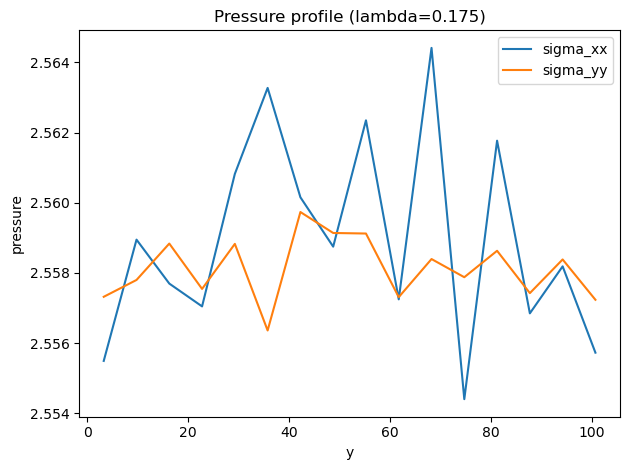

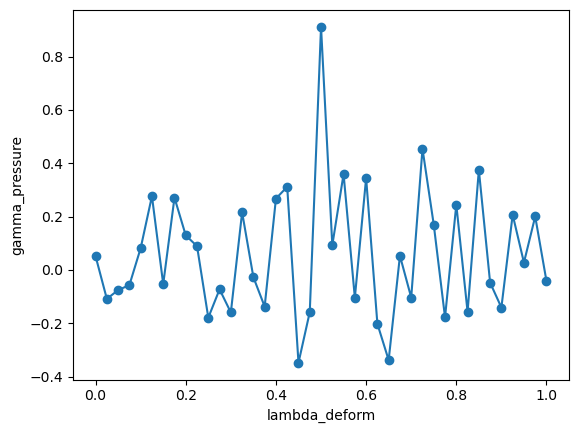

In [5]:
# --- Pressure profile and surface tension (gamma) from Pxx/Pyy ---

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# Temperature and lambda to analyze
T_value_pressure = T_value_primary
lambda_value_pressure = 0.175
step_min_pressure = 100000


def load_pressure_profile(storage: TStorage, member, step_min: int = 0):
    df = storage.read_csv(member, header=None, skiprows=1)
    if df.empty:
        print(f"[skip] empty pressure profile: {storage.member_name(member)}")
        return None

    steps = pd.to_numeric(df.iloc[:, 0], errors="coerce")
    mask = steps > step_min
    df = df.loc[mask]
    if df.empty:
        print(f"[skip] no rows after step>{step_min} in {storage.member_name(member)}")
        return None

    try:
        n_bins = int(df.iloc[0, 1])
        lx = float(df.iloc[0, 2])
        ly = float(df.iloc[0, 3])
    except Exception as exc:
        print(f"[warn] failed to parse metadata from {storage.member_name(member)}: {exc}")
        return None

    values = df.iloc[:, 4:].to_numpy(dtype=float)
    expected_cols = 3 * n_bins
    if values.shape[1] < expected_cols:
        print(
            f"[warn] expected >= {expected_cols} cols of pressure data, "
            f"got {values.shape[1]} in {storage.member_name(member)}"
        )
        return None
    values = values[:, :expected_cols]

    pxx = values[:, 0:n_bins]
    pyy = values[:, n_bins:2*n_bins]
    pxy = values[:, 2*n_bins:3*n_bins]
    y = (np.arange(n_bins) + 0.5) * ly / n_bins
    return {
        "steps": steps.loc[mask].to_numpy(),
        "pxx": pxx,
        "pyy": pyy,
        "pxy": pxy,
        "lx": lx,
        "ly": ly,
        "y": y,
        "n_bins": n_bins,
    }


with TStorage(T_value_pressure) as storage:
    print(
        f"Reading pressure directly from {storage.kind} for T={T_value_pressure}: "
        f"{storage.dir_path if storage.kind == 'dir' else storage.tar_path}"
    )
    storage.output_dir.mkdir(parents=True, exist_ok=True)

    pressure_members = sorted(
        storage.iter_members("lambda_*/sample_csv/pressure_profile.csv"),
        key=lambda m: storage.member_name(m),
    )

    def select_member_for_lambda(target_lambda):
        for mem in pressure_members:
            lam_val = storage.lambda_value(mem)
            if np.isfinite(lam_val) and np.isclose(lam_val, target_lambda):
                return mem
        return None

    main_member = select_member_for_lambda(lambda_value_pressure)
    data = load_pressure_profile(storage, main_member, step_min=step_min_pressure) if main_member else None
    if data is not None:
        pxx_mean = np.nanmean(data["pxx"], axis=0)
        pyy_mean = np.nanmean(data["pyy"], axis=0)
        y = data["y"]
        lx = data["lx"]

        fig, ax = plt.subplots()
        ax.plot(y, pxx_mean, label="sigma_xx")
        ax.plot(y, pyy_mean, label="sigma_yy")
        ax.set_xlabel("y")
        ax.set_ylabel("pressure")
        ax.set_title(f"Pressure profile (lambda={lambda_value_pressure})")
        ax.legend()
        fig.tight_layout()
        fig.savefig(storage.output_dir / f"pressure_profile_lambda_{lambda_value_pressure}.png", dpi=300)

        gamma_lambda = float(np.nanmean(pxx_mean - pyy_mean) * lx)
        print(f"gamma (pressure) for lambda={lambda_value_pressure}: {gamma_lambda}")
    else:
        gamma_lambda = float("nan")

    # Aggregate gamma over all lambda values for this T
    all_gamma = []
    for mem in pressure_members:
        lam_val = storage.lambda_value(mem)
        d = load_pressure_profile(storage, mem, step_min=step_min_pressure)
        if d is None:
            continue
        pxx_m = np.nanmean(d["pxx"], axis=0)
        pyy_m = np.nanmean(d["pyy"], axis=0)
        gamma_val = float(np.nanmean(pxx_m - pyy_m) * d["lx"] / 2)
        all_gamma.append({"lambda_deform": lam_val, "gamma_pressure": gamma_val})

    if all_gamma:
        gamma_df = pd.DataFrame(all_gamma).sort_values("lambda_deform")
        display(gamma_df)

        fig_g, ax_g = plt.subplots()
        ax_g.plot(
            gamma_df["lambda_deform"].to_numpy(),
            gamma_df["gamma_pressure"].to_numpy(),
            "o-",
        )
        ax_g.set_xlabel("lambda_deform")
        ax_g.set_ylabel("gamma_pressure")

        gamma_mean_all = float(gamma_df["gamma_pressure"].mean())
        gamma_std_all = float(gamma_df["gamma_pressure"].std(ddof=1))
        print(f"Mean gamma (pressure) over all lambda for T={T_value_pressure}: {gamma_mean_all}")
        print(f"Std gamma (pressure) over all lambda for T={T_value_pressure}: {gamma_std_all}")
    else:
        print(f"No gamma values computed for T={T_value_pressure}")



Linear fit: <U_tot> = gamma_micro * <AB_pair_length> + intercept
gamma_micro = 0.869309, intercept = -96605.7


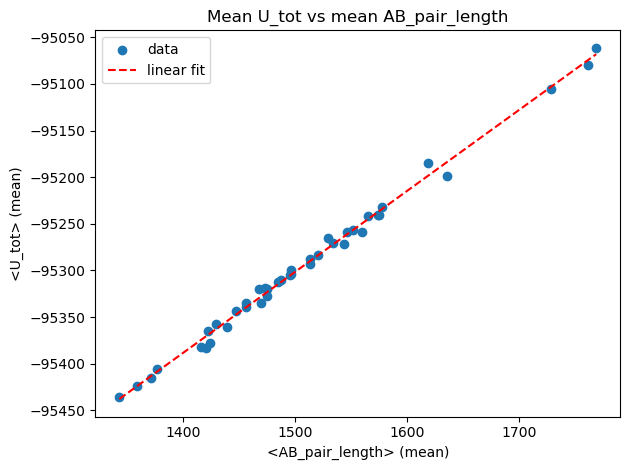

In [6]:
# --- Scatter: mean U_tot vs mean AB_pair_length (gamma_micro) ---

if "timeseries" not in globals() or "summary" not in globals():
    raise RuntimeError("Run the initial cells to populate 'summary' and 'timeseries' before fitting gamma_micro.")

# Reuse output_dir from the first cell if available; otherwise derive it from storage.
if "output_dir" not in globals():
    with TStorage(T_value_primary) as storage:
        output_dir = storage.output_dir
        output_dir.mkdir(parents=True, exist_ok=True)

# Mean U_tot per lambda (using the filtered timeseries)
mean_u_by_lambda = {}
for ts in timeseries:
    lam_val = float(ts["lambda_deform"])
    u_vals = np.array(ts["U_tot"], dtype=float)
    if u_vals.size == 0:
        continue
    u_mean = np.nanmean(u_vals)
    if np.isfinite(u_mean):
        mean_u_by_lambda[round(lam_val, 6)] = float(u_mean)

# Mean AB_pair_length per lambda
if "ab_length_by_lambda" in globals():
    ab_length_source = {round(float(k), 6): float(v) for k, v in ab_length_by_lambda.items() if np.isfinite(v)}
else:
    ab_length_source = {}
    T_value_ab = T_value_primary
    with TStorage(T_value_ab) as storage:
        for ab_member in storage.iter_members("lambda_*/sample_csv/ab_pair_length_log.csv"):
            lam_val = storage.lambda_value(ab_member)
            df_ab = storage.read_csv(ab_member)
            if "AB_pair_length" not in df_ab:
                continue

            ab_mean = pd.to_numeric(df_ab["AB_pair_length"], errors="coerce").mean()
            if np.isfinite(ab_mean):
                ab_length_source[round(lam_val, 6)] = float(ab_mean)

lam_vals = summary["lambda_deform"].to_numpy()
mean_u = []
mean_ab = []
for lam_val in lam_vals:
    key = round(float(lam_val), 6)
    mean_u.append(mean_u_by_lambda.get(key, np.nan))
    mean_ab.append(ab_length_source.get(key, np.nan))
mean_u = np.array(mean_u, dtype=float)
mean_ab = np.array(mean_ab, dtype=float)

mask = np.isfinite(mean_u) & np.isfinite(mean_ab)
if mask.sum() < 2:
    raise RuntimeError("Not enough paired <U_tot> and <AB_pair_length> values to fit gamma_micro.")

x_micro = mean_ab[mask]
y_micro = mean_u[mask]
gamma_micro, intercept_micro = np.polyfit(x_micro, y_micro, deg=1)

print("Linear fit: <U_tot> = gamma_micro * <AB_pair_length> + intercept")
print(f"gamma_micro = {gamma_micro:.6g}, intercept = {intercept_micro:.6g}")

fit_micro_df = pd.DataFrame({
    "lambda_deform": lam_vals[mask],
    "AB_pair_length_mean": x_micro,
    "U_tot_mean": y_micro,
    "U_tot_fit": gamma_micro * x_micro + intercept_micro,
})
fit_micro_df.to_csv(output_dir / "U_vs_AB_pair_length_fit.csv", index=False)

x_fit_micro = np.linspace(np.min(x_micro), np.max(x_micro), 100)
y_fit_micro = gamma_micro * x_fit_micro + intercept_micro

fig6, ax6 = plt.subplots()
ax6.scatter(x_micro, y_micro, label="data")
ax6.plot(x_fit_micro, y_fit_micro, "r--", label="linear fit")
ax6.set_xlabel("<AB_pair_length> (mean)")
ax6.set_ylabel("<U_tot> (mean)")
ax6.set_title("Mean U_tot vs mean AB_pair_length")
ax6.legend()
fig6.tight_layout()
fig6.savefig(output_dir / "fig6_U_vs_AB_pair_length.png", dpi=300)

plt.show()


In [7]:
# --- Gamma summary across methods ---

# Ensure output_dir exists for saving the summary CSV.
if "output_dir" not in globals():
    with TStorage(T_value_primary) as storage:
        output_dir = storage.output_dir
        output_dir.mkdir(parents=True, exist_ok=True)

gamma_rows = []


def add_gamma(method, value, uncertainty=None, notes=""):
    try:
        val = float(value)
    except Exception:
        val = float("nan")
    try:
        unc = float(uncertainty)
    except Exception:
        unc = float("nan")
    gamma_rows.append({"method": method, "gamma": val, "uncertainty": unc, "notes": notes})


if "gamma" in globals():
    add_gamma(
        "test_area_deltaF_vs_deltaLy",
        gamma,
        gamma_err if "gamma_err" in globals() else float("nan"),
        "weighted slope/2 from deltaF vs deltaLy",
    )

if "gamma_L" in globals():
    add_gamma(
        "deltaF_vs_AB_pair_length",
        gamma_L,
        gamma_L_err if "gamma_L_err" in globals() else float("nan"),
        "weighted deltaF vs <AB_pair_length>",
    )

if "gamma_mean" in globals():
    add_gamma(
        "cwa_mean_over_lambda",
        gamma_mean,
        gamma_sem if "gamma_sem" in globals() else float("nan"),
        "mean gamma_cwa across lambdas",
    )

if "gamma_mean_all" in globals():
    add_gamma(
        "irving_kirkwood_pressure_mean",
        gamma_mean_all,
        gamma_std_all if "gamma_std_all" in globals() else float("nan"),
        "mean gamma_pressure across lambdas",
    )
elif "gamma_lambda" in globals():
    add_gamma(
        f"irving_kirkwood_pressure_lambda_{lambda_value_pressure}",
        gamma_lambda,
        float("nan"),
        "single lambda from pressure profile",
    )

if "gamma_micro" in globals():
    add_gamma(
        "gamma_micro_U_vs_AB_length",
        gamma_micro,
        float("nan"),
        "<U_tot> vs <AB_pair_length> slope",
    )

if not gamma_rows:
    raise RuntimeError("No gamma values found to summarize. Run previous cells first.")

gamma_methods_df = pd.DataFrame(gamma_rows)
display(gamma_methods_df)

out_gamma_summary = output_dir / "gamma_methods_summary.csv"
gamma_methods_df.to_csv(out_gamma_summary, index=False)
print(f"Saved gamma summary to {out_gamma_summary}")


,method,gamma,uncertainty,notes
0,test_area_deltaF_vs_deltaLy,0.038252,0.698100,weighted slope/2 from deltaF vs deltaLy
1,deltaF_vs_AB_pair_length,0.001203,0.003448,weighted deltaF vs <AB_pair_length>
2,cwa_mean_over_lambda,0.137101,0.003675,mean gamma_cwa across lambdas
3,irving_kirkwood_pressure_mean,0.059329,0.243619,mean gamma_pressure across lambdas
4,gamma_micro_U_vs_AB_length,0.869309,NaN,<U_tot> vs <AB_pair_length> slope


Saved gamma summary to /home/bh692/scratch_pi_co54/bh692/results/20260113_test_area_with_num_tri_types/T_1.0_analysis/data_analysis/gamma_methods_summary.csv


In [8]:
# --- AB network tangent correlations and Fourier spectrum over all lambdas ---
import csv
import math
import re
from collections import defaultdict

import matplotlib.pyplot as plt
import numpy as np

step_min_network = 100000     # ignore early transients
step_stride_network = 1       # set >1 to thin snapshots if runtime is high
max_snapshots_network = None  # cap processed snapshots per lambda
# Set ds_bin_override to fix the resampling spacing (shared across lambdas); None uses per-chain mean edge length.
ds_bin_override = None

if 'T_value_primary' not in globals():
    raise RuntimeError('Run the initial cells so T_value_primary and TStorage are defined.')
if 'output_dir' not in globals():
    with TStorage(T_value_primary) as storage:
        output_dir = storage.output_dir
        output_dir.mkdir(parents=True, exist_ok=True)

# Lambdas to process: use summary if available to align with Ly_mean lookup.
if 'summary' in globals():
    lambda_values = summary['lambda_deform'].to_numpy()
    ly_lookup = {round(float(lam), 6): float(ly) for lam, ly in zip(summary['lambda_deform'], summary['Ly_mean'])}
else:
    raise RuntimeError('summary (with lambda_deform and Ly_mean) not found; run earlier cells.')


def parse_ab_network_snapshot(storage, member):
    nodes = defaultdict(dict)
    edges = defaultdict(list)
    with storage.open_text(member) as handle:
        reader = csv.reader(handle)
        for row in reader:
            if not row:
                continue
            kind = row[0].strip().lower()
            if kind == 'node' and len(row) >= 9:
                net_idx = int(row[2])
                node_idx = int(row[4])
                x = float(row[6])
                y = float(row[8])
                nodes[net_idx][node_idx] = (x, y)
            elif kind == 'edge' and len(row) >= 9:
                net_idx = int(row[2])
                node0 = int(row[6])
                node1 = int(row[8])
                edges[net_idx].append({'node0': node0, 'node1': node1})
    networks = []
    for net_idx in sorted(set(nodes.keys()) | set(edges.keys())):
        node_map = nodes.get(net_idx, {})
        edge_list = edges.get(net_idx, [])
        total_length = 0.0
        for edge in edge_list:
            n0 = node_map.get(edge['node0'])
            n1 = node_map.get(edge['node1'])
            if n0 is None or n1 is None:
                continue
            dx = n1[0] - n0[0]
            dy = n1[1] - n0[1]
            total_length += math.hypot(dx, dy)
        networks.append({'net_idx': net_idx, 'nodes': node_map, 'edges': edge_list, 'length': total_length})
    return networks


def order_cycle(net):
    nodes = net['nodes']
    edges = net['edges']
    if len(nodes) < 2 or len(edges) < 2:
        return None

    adj = defaultdict(list)
    for edge in edges:
        n0 = edge['node0']
        n1 = edge['node1']
        if n0 not in nodes or n1 not in nodes:
            continue
        adj[n0].append(n1)
        adj[n1].append(n0)

    start = next((idx for idx, nbrs in adj.items() if nbrs), None)
    if start is None:
        return None

    order = [start]
    current = start
    prev = None
    visited_edges = set()

    while True:
        neighbors = adj[current]
        candidates = [n for n in neighbors if (min(n, current), max(n, current)) not in visited_edges]
        if not candidates:
            break
        if prev is not None and prev in candidates and len(candidates) > 1:
            candidates = [n for n in candidates if n != prev] + [prev]
        nxt = candidates[0]
        visited_edges.add((min(current, nxt), max(current, nxt)))
        order.append(nxt)
        prev, current = current, nxt
        if current == start:
            break
        if len(visited_edges) > len(edges) + len(nodes):
            break

    if order[-1] != start and start in adj[order[-1]]:
        order.append(start)

    coords = [nodes[idx] for idx in order if idx in nodes]
    if len(coords) < 2:
        return None

    seg_dirs = []
    seg_lengths = []
    for (x0, y0), (x1, y1) in zip(coords[:-1], coords[1:]):
        dx = x1 - x0
        dy = y1 - y0
        seg_len = math.hypot(dx, dy)
        if seg_len <= 0:
            continue
        seg_dirs.append((dx / seg_len, dy / seg_len))
        seg_lengths.append(seg_len)

    if not seg_dirs:
        return None

    seg_dirs = np.asarray(seg_dirs, dtype=float)
    seg_lengths = np.asarray(seg_lengths, dtype=float)
    total_length = float(seg_lengths.sum())
    ds = float(total_length / seg_dirs.shape[0]) if seg_dirs.shape[0] else float('nan')
    s_grid = np.arange(seg_dirs.shape[0], dtype=float) * ds
    return {'tau': seg_dirs, 'seg_lengths': seg_lengths, 'total_length': total_length, 'ds': ds, 's': s_grid}


def resample_cycle(tau, seg_lengths, target_ds=None):
    cum_dist = np.concatenate(([0.0], np.cumsum(seg_lengths)))
    total_len = float(cum_dist[-1])
    if target_ds is None:
        target_ds = float(np.nanmean(seg_lengths))
    if not np.isfinite(target_ds) or target_ds <= 0:
        return None
    n_new = max(int(round(total_len / target_ds)), 2)
    new_s = np.linspace(0.0, total_len, n_new, endpoint=False)
    tau_x_new = np.interp(new_s, cum_dist[:-1], tau[:, 0], period=total_len)
    tau_y_new = np.interp(new_s, cum_dist[:-1], tau[:, 1], period=total_len)
    norm = np.sqrt(tau_x_new ** 2 + tau_y_new ** 2)
    norm[norm == 0] = 1.0
    tau_new = np.stack((tau_x_new / norm, tau_y_new / norm), axis=1)
    ds_uniform = float(total_len / n_new)
    return tau_new, ds_uniform, total_len


def cyclic_autocorrelation_sq(tau_vectors):
    if tau_vectors.size == 0:
        return None
    tx = tau_vectors[:, 0]
    ty = tau_vectors[:, 1]
    n = tau_vectors.shape[0]

    tx_sq = tx * tx
    ty_sq = ty * ty
    txy = tx * ty

    fft_tx_sq = np.fft.fft(tx_sq)
    fft_ty_sq = np.fft.fft(ty_sq)
    fft_txy = np.fft.fft(txy)

    c_tx_sq = np.fft.ifft(fft_tx_sq * np.conjugate(fft_tx_sq)).real / n
    c_ty_sq = np.fft.ifft(fft_ty_sq * np.conjugate(fft_ty_sq)).real / n
    c_txy = np.fft.ifft(fft_txy * np.conjugate(fft_txy)).real / n

    corr_sq = c_tx_sq + c_ty_sq + 2.0 * c_txy
    return corr_sq


spectra = []
with TStorage(T_value_primary) as storage:
    for lam_val in lambda_values:
        lam_label = f"{float(lam_val):.6f}"
        pattern_network = f"lambda_{lam_label}/ab_networks/csv/ab_network_snapshot_step_*.csv"

        corr_records = []
        snapshot_records = []
        candidate_idx = 0

        for member in storage.iter_members(pattern_network):
            step_match = re.search(r'step_(\d+)', storage.member_name(member))
            step_val = int(step_match.group(1)) if step_match else None
            if step_val is not None and step_min_network is not None and step_val < step_min_network:
                continue

            candidate_idx += 1
            if step_stride_network > 1 and (candidate_idx - 1) % step_stride_network != 0:
                continue
            if max_snapshots_network is not None and len(snapshot_records) >= max_snapshots_network:
                break

            networks = parse_ab_network_snapshot(storage, member)
            if not networks:
                continue

            top_two = sorted(networks, key=lambda n: n['length'], reverse=True)[:2]
            if len(top_two) < 2:
                continue

            for chain_idx, net in enumerate(top_two):
                ordered = order_cycle(net)
                if ordered is None or not np.isfinite(ordered['ds']):
                    continue
                resampled = resample_cycle(ordered['tau'], ordered['seg_lengths'], target_ds=ds_bin_override)
                if resampled is None:
                    continue
                tau_uniform, ds_uniform, total_len_uniform = resampled
                corr_vals = cyclic_autocorrelation_sq(tau_uniform)
                if corr_vals is None:
                    continue

                s_target = np.arange(corr_vals.shape[0], dtype=float) * ds_uniform
                corr_records.append({
                    'step': step_val,
                    'lambda': lam_val,
                    'chain_idx': chain_idx,
                    's': s_target,
                    'corr': corr_vals,
                    'ds': ds_uniform,
                    'total_length': total_len_uniform,
                })

            snapshot_records.append({'step': step_val, 'lambda': lam_val, 'n_networks': len(networks)})

        if not corr_records:
            print(f"[skip] lambda={lam_label}: no correlations collected")
            continue

        lengths = np.array([rec['total_length'] for rec in corr_records], dtype=float)
        ds_values = np.array([rec['ds'] for rec in corr_records], dtype=float)

        if ds_bin_override is not None:
            ds_common = float(ds_bin_override)
        else:
            ds_common = float(np.nanmedian(ds_values))
        if not np.isfinite(ds_common) or ds_common <= 0:
            print(f"[skip] lambda={lam_label}: invalid ds_common {ds_common}")
            continue

        max_s_common = float(np.nanmax(lengths))
        if not np.isfinite(max_s_common) or max_s_common <= 0:
            print(f"[skip] lambda={lam_label}: invalid max chain length")
            continue

        n_bins_common = int(np.ceil(max_s_common / ds_common)) + 1
        n_bins_common = max(n_bins_common, 2)
        s_common = np.arange(n_bins_common, dtype=float) * ds_common

        accum = np.zeros_like(s_common, dtype=float)
        counts = np.zeros_like(s_common, dtype=int)
        for rec in corr_records:
            interp_vals = np.interp(s_common, rec['s'], rec['corr'], left=np.nan, right=np.nan)
            valid = np.isfinite(interp_vals)
            accum[valid] += interp_vals[valid]
            counts[valid] += 1

        C_mean = np.divide(accum, counts, out=np.full_like(accum, np.nan, dtype=float), where=counts > 0)

        mask = counts > 0
        last_valid_idx = int(np.max(np.nonzero(mask))) if mask.any() else 0
        corr_for_fft = np.nan_to_num(C_mean[: last_valid_idx + 1], nan=0.0)

        n_tail = max(1, int(0.1 * corr_for_fft.size))
        baseline_est = float(np.nanmean(corr_for_fft[-n_tail:])) if corr_for_fft.size else 0.0
        if not np.isfinite(baseline_est):
            baseline_est = 0.0
        corr_fluctuation = corr_for_fft - baseline_est

        q_vals = np.fft.rfftfreq(corr_fluctuation.size, d=ds_common)
        c_tilde = np.fft.rfft(corr_fluctuation)

        ly_val = ly_lookup.get(round(float(lam_val), 6), 1.0)
        spectra.append({
            'lambda': float(lam_val),
            'q': q_vals,
            'c_tilde': c_tilde,
            'ly': ly_val,
            'ds_common': ds_common,
            'baseline': baseline_est,
            'n_bins_common': n_bins_common,
            'n_snapshots': len(snapshot_records),
        })

        print(
            f"lambda={lam_label}: ds_common={ds_common:.6g}, baseline={baseline_est:.6g}, "
            f"length min/med/max={np.nanmin(lengths):.6g}/{np.nanmedian(lengths):.6g}/{np.nanmax(lengths):.6g}, "
            f"bins={n_bins_common}, snapshots={len(snapshot_records)}"
        )

if not spectra:
    raise RuntimeError('No spectra computed for any lambda.')


lambda=0.000000: ds_common=0.638335, baseline=0.5017, length min/med/max=1.03178/154.627/472.309, bins=741, snapshots=3999
lambda=0.025000: ds_common=0.63852, baseline=0.505624, length min/med/max=1.00094/169.723/461.742, bins=725, snapshots=3999
lambda=0.050000: ds_common=0.637513, baseline=0.501178, length min/med/max=0.98602/161.026/479.401, bins=753, snapshots=3999
lambda=0.075000: ds_common=0.637997, baseline=0.509163, length min/med/max=0.986513/157.135/453.048, bins=712, snapshots=3999
lambda=0.100000: ds_common=0.636758, baseline=0.505445, length min/med/max=1.08955/153.988/414.705, bins=653, snapshots=3999
lambda=0.125000: ds_common=0.638648, baseline=0.502306, length min/med/max=0.970649/145.175/432.99, bins=679, snapshots=3999
lambda=0.150000: ds_common=0.637943, baseline=0.50298, length min/med/max=0.988595/175.487/489.111, bins=768, snapshots=3999
lambda=0.175000: ds_common=0.637604, baseline=0.50392, length min/med/max=1.02705/157.83/505.666, bins=795, snapshots=3999
lamb

lambda=0.000000: ds_common=0.638335, baseline=0.5017, length min/med/max=1.03178/154.627/472.309, bins=741, snapshots=3999, mean_Ct_qwin=0.666883, gamma=4.6982
lambda=0.025000: ds_common=0.63852, baseline=0.505624, length min/med/max=1.00094/169.723/461.742, bins=725, snapshots=3999, mean_Ct_qwin=0.76136, gamma=4.11401
lambda=0.050000: ds_common=0.637513, baseline=0.501178, length min/med/max=0.98602/161.026/479.401, bins=753, snapshots=3999, mean_Ct_qwin=0.613672, gamma=5.11217
lambda=0.075000: ds_common=0.637997, baseline=0.509163, length min/med/max=0.986513/157.135/453.048, bins=712, snapshots=3999, mean_Ct_qwin=0.7916, gamma=3.9601
lambda=0.100000: ds_common=0.636758, baseline=0.505445, length min/med/max=1.08955/153.988/414.705, bins=653, snapshots=3999, mean_Ct_qwin=0.789564, gamma=3.97803
lambda=0.125000: ds_common=0.638648, baseline=0.502306, length min/med/max=0.970649/145.175/432.99, bins=679, snapshots=3999, mean_Ct_qwin=0.670156, gamma=4.67296
lambda=0.150000: ds_common=0.

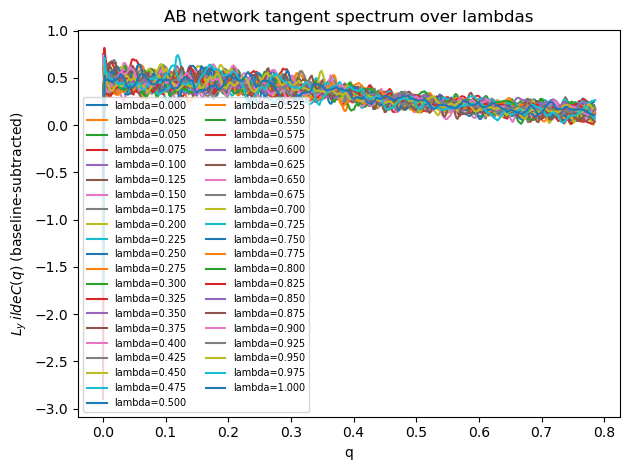

In [9]:
# --- AB network tangent correlations and Fourier spectrum over all lambdas ---
import csv
import math
import re
from collections import defaultdict

import matplotlib.pyplot as plt
import numpy as np

step_min_network = 100000     # ignore early transients
step_stride_network = 1       # set >1 to thin snapshots if runtime is high
max_snapshots_network = None  # cap processed snapshots per lambda
# Set ds_bin_override to fix the resampling spacing (shared across lambdas); None uses per-chain mean edge length.
ds_bin_override = None

# Gamma from spectrum parameters
k_B = 1.0  # set Boltzmann constant to match your MD unit system
q_min_gamma = 0.05
q_max_gamma = 0.2

if 'T_value_primary' not in globals():
    raise RuntimeError('Run the initial cells so T_value_primary and TStorage are defined.')
if 'output_dir' not in globals():
    with TStorage(T_value_primary) as storage:
        output_dir = storage.output_dir
        output_dir.mkdir(parents=True, exist_ok=True)

# Lambdas to process: use summary if available to align with Ly_mean lookup.
if 'summary' in globals():
    lambda_values = summary['lambda_deform'].to_numpy()
    ly_lookup = {round(float(lam), 6): float(ly) for lam, ly in zip(summary['lambda_deform'], summary['Ly_mean'])}
else:
    raise RuntimeError('summary (with lambda_deform and Ly_mean) not found; run earlier cells.')


def parse_ab_network_snapshot(storage, member):
    nodes = defaultdict(dict)
    edges = defaultdict(list)
    with storage.open_text(member) as handle:
        reader = csv.reader(handle)
        for row in reader:
            if not row:
                continue
            kind = row[0].strip().lower()
            if kind == 'node' and len(row) >= 9:
                net_idx = int(row[2])
                node_idx = int(row[4])
                x = float(row[6])
                y = float(row[8])
                nodes[net_idx][node_idx] = (x, y)
            elif kind == 'edge' and len(row) >= 9:
                net_idx = int(row[2])
                node0 = int(row[6])
                node1 = int(row[8])
                edges[net_idx].append({'node0': node0, 'node1': node1})
    networks = []
    for net_idx in sorted(set(nodes.keys()) | set(edges.keys())):
        node_map = nodes.get(net_idx, {})
        edge_list = edges.get(net_idx, [])
        total_length = 0.0
        for edge in edge_list:
            n0 = node_map.get(edge['node0'])
            n1 = node_map.get(edge['node1'])
            if n0 is None or n1 is None:
                continue
            dx = n1[0] - n0[0]
            dy = n1[1] - n0[1]
            total_length += math.hypot(dx, dy)
        networks.append({'net_idx': net_idx, 'nodes': node_map, 'edges': edge_list, 'length': total_length})
    return networks


def order_cycle(net):
    nodes = net['nodes']
    edges = net['edges']
    if len(nodes) < 2 or len(edges) < 2:
        return None

    adj = defaultdict(list)
    for edge in edges:
        n0 = edge['node0']
        n1 = edge['node1']
        if n0 not in nodes or n1 not in nodes:
            continue
        adj[n0].append(n1)
        adj[n1].append(n0)

    start = next((idx for idx, nbrs in adj.items() if nbrs), None)
    if start is None:
        return None

    order = [start]
    current = start
    prev = None
    visited_edges = set()

    while True:
        neighbors = adj[current]
        candidates = [n for n in neighbors if (min(n, current), max(n, current)) not in visited_edges]
        if not candidates:
            break
        if prev is not None and prev in candidates and len(candidates) > 1:
            candidates = [n for n in candidates if n != prev] + [prev]
        nxt = candidates[0]
        visited_edges.add((min(current, nxt), max(current, nxt)))
        order.append(nxt)
        prev, current = current, nxt
        if current == start:
            break
        if len(visited_edges) > len(edges) + len(nodes):
            break

    if order[-1] != start and start in adj[order[-1]]:
        order.append(start)

    coords = [nodes[idx] for idx in order if idx in nodes]
    if len(coords) < 2:
        return None

    seg_dirs = []
    seg_lengths = []
    for (x0, y0), (x1, y1) in zip(coords[:-1], coords[1:]):
        dx = x1 - x0
        dy = y1 - y0
        seg_len = math.hypot(dx, dy)
        if seg_len <= 0:
            continue
        seg_dirs.append((dx / seg_len, dy / seg_len))
        seg_lengths.append(seg_len)

    if not seg_dirs:
        return None

    seg_dirs = np.asarray(seg_dirs, dtype=float)
    seg_lengths = np.asarray(seg_lengths, dtype=float)
    total_length = float(seg_lengths.sum())
    ds = float(total_length / seg_dirs.shape[0]) if seg_dirs.shape[0] else float('nan')
    s_grid = np.arange(seg_dirs.shape[0], dtype=float) * ds
    return {'tau': seg_dirs, 'seg_lengths': seg_lengths, 'total_length': total_length, 'ds': ds, 's': s_grid}


def resample_cycle(tau, seg_lengths, target_ds=None):
    cum_dist = np.concatenate(([0.0], np.cumsum(seg_lengths)))
    total_len = float(cum_dist[-1])
    if target_ds is None:
        target_ds = float(np.nanmean(seg_lengths))
    if not np.isfinite(target_ds) or target_ds <= 0:
        return None
    n_new = max(int(round(total_len / target_ds)), 2)
    new_s = np.linspace(0.0, total_len, n_new, endpoint=False)
    tau_x_new = np.interp(new_s, cum_dist[:-1], tau[:, 0], period=total_len)
    tau_y_new = np.interp(new_s, cum_dist[:-1], tau[:, 1], period=total_len)
    norm = np.sqrt(tau_x_new ** 2 + tau_y_new ** 2)
    norm[norm == 0] = 1.0
    tau_new = np.stack((tau_x_new / norm, tau_y_new / norm), axis=1)
    ds_uniform = float(total_len / n_new)
    return tau_new, ds_uniform, total_len


def cyclic_autocorrelation_sq(tau_vectors):
    if tau_vectors.size == 0:
        return None
    tx = tau_vectors[:, 0]
    ty = tau_vectors[:, 1]
    n = tau_vectors.shape[0]

    tx_sq = tx * tx
    ty_sq = ty * ty
    txy = tx * ty

    fft_tx_sq = np.fft.fft(tx_sq)
    fft_ty_sq = np.fft.fft(ty_sq)
    fft_txy = np.fft.fft(txy)

    c_tx_sq = np.fft.ifft(fft_tx_sq * np.conjugate(fft_tx_sq)).real / n
    c_ty_sq = np.fft.ifft(fft_ty_sq * np.conjugate(fft_ty_sq)).real / n
    c_txy = np.fft.ifft(fft_txy * np.conjugate(fft_txy)).real / n

    corr_sq = c_tx_sq + c_ty_sq + 2.0 * c_txy
    return corr_sq


spectra = []
gamma_rows = []
with TStorage(T_value_primary) as storage:
    for lam_val in lambda_values:
        lam_label = f"{float(lam_val):.6f}"
        pattern_network = f"lambda_{lam_label}/ab_networks/csv/ab_network_snapshot_step_*.csv"

        corr_records = []
        snapshot_records = []
        candidate_idx = 0

        for member in storage.iter_members(pattern_network):
            step_match = re.search(r'step_(\d+)', storage.member_name(member))
            step_val = int(step_match.group(1)) if step_match else None
            if step_val is not None and step_min_network is not None and step_val < step_min_network:
                continue

            candidate_idx += 1
            if step_stride_network > 1 and (candidate_idx - 1) % step_stride_network != 0:
                continue
            if max_snapshots_network is not None and len(snapshot_records) >= max_snapshots_network:
                break

            networks = parse_ab_network_snapshot(storage, member)
            if not networks:
                continue

            top_two = sorted(networks, key=lambda n: n['length'], reverse=True)[:2]
            if len(top_two) < 2:
                continue

            for chain_idx, net in enumerate(top_two):
                ordered = order_cycle(net)
                if ordered is None or not np.isfinite(ordered['ds']):
                    continue
                resampled = resample_cycle(ordered['tau'], ordered['seg_lengths'], target_ds=ds_bin_override)
                if resampled is None:
                    continue
                tau_uniform, ds_uniform, total_len_uniform = resampled
                corr_vals = cyclic_autocorrelation_sq(tau_uniform)
                if corr_vals is None:
                    continue

                s_target = np.arange(corr_vals.shape[0], dtype=float) * ds_uniform
                corr_records.append({
                    'step': step_val,
                    'lambda': lam_val,
                    'chain_idx': chain_idx,
                    's': s_target,
                    'corr': corr_vals,
                    'ds': ds_uniform,
                    'total_length': total_len_uniform,
                })

            snapshot_records.append({'step': step_val, 'lambda': lam_val, 'n_networks': len(networks)})

        if not corr_records:
            print(f"[skip] lambda={lam_label}: no correlations collected")
            continue

        lengths = np.array([rec['total_length'] for rec in corr_records], dtype=float)
        ds_values = np.array([rec['ds'] for rec in corr_records], dtype=float)

        if ds_bin_override is not None:
            ds_common = float(ds_bin_override)
        else:
            ds_common = float(np.nanmedian(ds_values))
        if not np.isfinite(ds_common) or ds_common <= 0:
            print(f"[skip] lambda={lam_label}: invalid ds_common {ds_common}")
            continue

        max_s_common = float(np.nanmax(lengths))
        if not np.isfinite(max_s_common) or max_s_common <= 0:
            print(f"[skip] lambda={lam_label}: invalid max chain length")
            continue

        n_bins_common = int(np.ceil(max_s_common / ds_common)) + 1
        n_bins_common = max(n_bins_common, 2)
        s_common = np.arange(n_bins_common, dtype=float) * ds_common

        accum = np.zeros_like(s_common, dtype=float)
        counts = np.zeros_like(s_common, dtype=int)
        for rec in corr_records:
            interp_vals = np.interp(s_common, rec['s'], rec['corr'], left=np.nan, right=np.nan)
            valid = np.isfinite(interp_vals)
            accum[valid] += interp_vals[valid]
            counts[valid] += 1

        C_mean = np.divide(accum, counts, out=np.full_like(accum, np.nan, dtype=float), where=counts > 0)

        mask = counts > 0
        last_valid_idx = int(np.max(np.nonzero(mask))) if mask.any() else 0
        corr_for_fft = np.nan_to_num(C_mean[: last_valid_idx + 1], nan=0.0)

        n_tail = max(1, int(0.1 * corr_for_fft.size))
        baseline_est = float(np.nanmean(corr_for_fft[-n_tail:])) if corr_for_fft.size else 0.0
        if not np.isfinite(baseline_est):
            baseline_est = 0.0
        corr_fluctuation = corr_for_fft - baseline_est

        q_vals = np.fft.rfftfreq(corr_fluctuation.size, d=ds_common)
        c_tilde = np.fft.rfft(corr_fluctuation)

        # Gamma estimate from mean C~(q) in [q_min_gamma, q_max_gamma]
        mask_q = (q_vals >= q_min_gamma) & (q_vals <= q_max_gamma)
        mean_ct = float(np.nanmean(np.real(c_tilde)[mask_q])) if mask_q.any() else float('nan')
        if np.isfinite(mean_ct) and mean_ct != 0.0 and np.isfinite(ds_common):
            gamma_val = 2.0 * k_B * T_value_primary / (ds_common * mean_ct)
        else:
            gamma_val = float('nan')

        ly_val = ly_lookup.get(round(float(lam_val), 6), 1.0)
        spectra.append({
            'lambda': float(lam_val),
            'q': q_vals,
            'c_tilde': c_tilde,
            'ly': ly_val,
            'ds_common': ds_common,
            'baseline': baseline_est,
            'n_bins_common': n_bins_common,
            'n_snapshots': len(snapshot_records),
            'gamma_est': gamma_val,
            'mean_ct_qwin': mean_ct,
        })

        gamma_rows.append({
            'lambda': float(lam_val),
            'gamma_fft_window': gamma_val,
            'mean_ct_qwin': mean_ct,
            'ds_common': ds_common,
            'baseline': baseline_est,
            'n_bins_common': n_bins_common,
            'n_snapshots': len(snapshot_records),
        })

        print(
            f"lambda={lam_label}: ds_common={ds_common:.6g}, baseline={baseline_est:.6g}, "
            f"length min/med/max={np.nanmin(lengths):.6g}/{np.nanmedian(lengths):.6g}/{np.nanmax(lengths):.6g}, "
            f"bins={n_bins_common}, snapshots={len(snapshot_records)}, mean_Ct_qwin={mean_ct:.6g}, gamma={gamma_val:.6g}"
        )

if not spectra:
    raise RuntimeError('No spectra computed for any lambda.')

fig_fft_all, ax_fft_all = plt.subplots()
for spec in spectra:
    y_vals = spec['ds_common'] * np.real(spec['c_tilde'])
    ax_fft_all.plot(spec['q'], y_vals, label=f"lambda={spec['lambda']:.3f}")

ax_fft_all.set_xlabel('q')
ax_fft_all.set_ylabel(r'$L_y \, 	ilde{C}(q)$ (baseline-subtracted)')
ax_fft_all.set_title('AB network tangent spectrum over lambdas')
ax_fft_all.legend(fontsize=7, ncol=2)
fig_fft_all.tight_layout()
fft_all_path = output_dir / 'ab_network_fft_all_lambdas.png'
fig_fft_all.savefig(fft_all_path, dpi=300)
print(f'Saved aggregate FFT plot to {fft_all_path}')

# Gamma summary across lambdas
import pandas as pd

gamma_df = pd.DataFrame(gamma_rows)
valid_gamma = gamma_df['gamma_fft_window'].replace([np.inf, -np.inf], np.nan).dropna()
mean_gamma = float(valid_gamma.mean()) if not valid_gamma.empty else float('nan')
sem_gamma = float(valid_gamma.std(ddof=1) / math.sqrt(len(valid_gamma))) if len(valid_gamma) > 1 else float('nan')

summary_path = output_dir / 'ab_network_gamma_fft_window.csv'
gamma_df.to_csv(summary_path, index=False)
print(f'Saved gamma estimates to {summary_path}')
print(f'Gamma mean over lambdas = {mean_gamma:.6g} +/- {sem_gamma:.6g} (SEM), using q in [{q_min_gamma}, {q_max_gamma}]')


Collected 163959 per-frame totals and 28444477 per-network lengths
Total length per frame: n=163959, mean=1507.35, std=354.052, width=1776.31 (max-min)
Network component length: n=28444477, mean=8.68861, std=32.6658, width=522.15 (max-min)
Saved total-length histogram to /home/bh692/scratch_pi_co54/bh692/results/20260113_test_area_with_num_tri_types/T_1.0_analysis/data_analysis/ab_network_total_length_hist.png
Saved per-network histogram to /home/bh692/scratch_pi_co54/bh692/results/20260113_test_area_with_num_tri_types/T_1.0_analysis/data_analysis/ab_network_individual_length_hist.png
Wrote samples to /home/bh692/scratch_pi_co54/bh692/results/20260113_test_area_with_num_tri_types/T_1.0_analysis/data_analysis/ab_network_total_lengths.csv and /home/bh692/scratch_pi_co54/bh692/results/20260113_test_area_with_num_tri_types/T_1.0_analysis/data_analysis/ab_network_component_lengths.csv


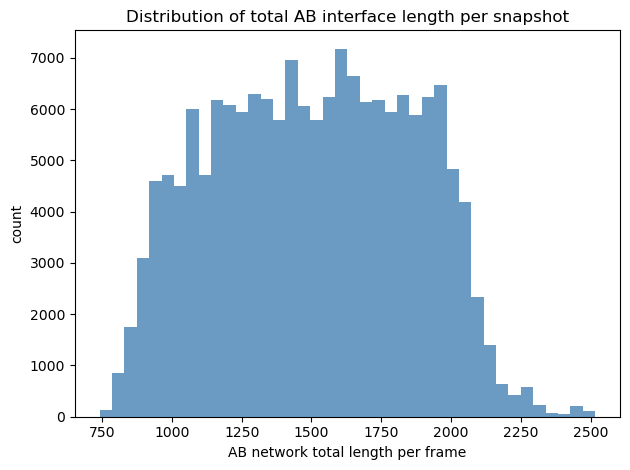

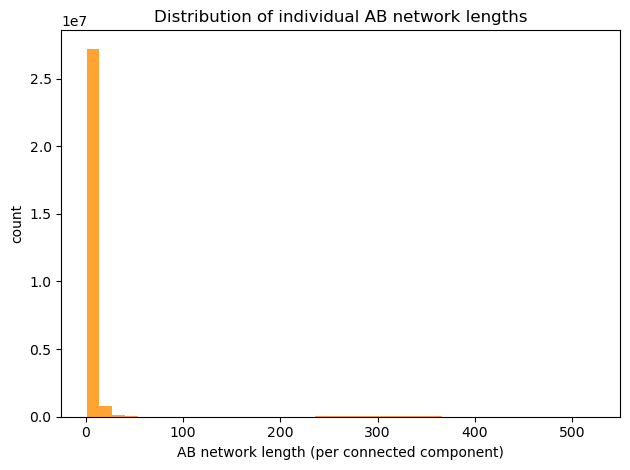

In [10]:
# --- AB pair network length histograms (per-lambda totals and per-network components) ---
import math
import re
from collections import defaultdict
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


if 'T_value_primary' not in globals():
    raise RuntimeError('Run the setup cell defining T_value_primary before this analysis.')
if 'TStorage' not in globals() or not callable(TStorage):
    raise RuntimeError('Run the setup cell that defines the TStorage class before this analysis.')
if 'summary' not in globals():
    raise RuntimeError('summary (with lambda_deform and Ly_mean) not found; run earlier cells.')
if 'lambda_deform' not in summary.columns:
    raise RuntimeError('summary (with lambda_deform) not found; run earlier cells.')
if 'Ly_mean' not in summary.columns:
    raise RuntimeError('summary (with Ly_mean) not found; run earlier cells.')

step_min_len = step_min_network if 'step_min_network' in globals() else 0
step_stride_len = step_stride_network if 'step_stride_network' in globals() else 1
max_snapshots_len = max_snapshots_network if 'max_snapshots_network' in globals() else None

lambda_values = summary['lambda_deform'].to_numpy()
ly_by_lambda = dict(zip(lambda_values, summary['Ly_mean'].to_numpy()))

def summarize_series(series: pd.Series):
    series = series.dropna()
    if series.empty:
        return None
    mean = float(series.mean())
    std = float(series.std(ddof=1)) if len(series) > 1 else float('nan')
    width = float(series.max() - series.min())
    return {
        'n': int(series.shape[0]),
        'mean': mean,
        'std': std,
        'width': width,
    }


def save_histogram(series: pd.Series, bins: int, csv_path: Path, fig_path: Path, title: str):
    series = series.dropna()
    if series.empty:
        print(f"[skip] {title}: no samples")
        return

    stats = summarize_series(series)
    counts, bin_edges = np.histogram(series.to_numpy(), bins=bins)
    bin_left = bin_edges[:-1]
    bin_right = bin_edges[1:]
    bin_center = 0.5 * (bin_left + bin_right)

    df_hist = pd.DataFrame({
        'bin_left': bin_left,
        'bin_right': bin_right,
        'bin_center': bin_center,
        'count': counts,
    })
    df_hist['n'] = stats['n']
    df_hist['mean'] = stats['mean']
    df_hist['std'] = stats['std']
    df_hist['width'] = stats['width']
    df_hist.to_csv(csv_path, index=False)

    fig, ax = plt.subplots()
    ax.hist(series, bins=bin_edges, color='steelblue', alpha=0.8)
    ax.axvline(stats['mean'], color='black', linestyle='--', linewidth=1.5, label=f"mean={stats['mean']:.6g}")
    if math.isfinite(stats['std']):
        ax.axvspan(stats['mean'] - stats['std'], stats['mean'] + stats['std'], color='gray', alpha=0.2,
                   label=f"std={stats['std']:.6g}")
    ax.set_title(title)
    ax.set_xlabel('length')
    ax.set_ylabel('count')
    ax.legend(loc='best')
    fig.tight_layout()
    fig.savefig(fig_path, dpi=300)
    print(f"Saved histogram to {fig_path} and data to {csv_path}")


output_base = Path('results') / 'analysis' / f"T_{T_value_primary:g}"
output_base.mkdir(parents=True, exist_ok=True)

summary_total_rows = []
summary_component_rows = []
summary_gt_ly_rows = []

with TStorage(T_value_primary) as storage:
    for lam_val in lambda_values:
        lam_label = f"{float(lam_val):.6f}"
        lam_dir = output_base / f"lambda_{lam_label}"
        lam_dir.mkdir(parents=True, exist_ok=True)

        pattern_network = f"lambda_{lam_label}/ab_networks/csv/ab_network_snapshot_step_*.csv"

        total_len_samples = []
        network_len_samples = []
        network_len_gt_ly_samples = []

        snapshots_done = 0
        candidate_idx = 0

        for member in storage.iter_members(pattern_network):
            step_match = re.search(r'step_(\d+)', storage.member_name(member))
            step_val = int(step_match.group(1)) if step_match else None
            if step_val is not None and step_min_len is not None and step_val < step_min_len:
                continue

            candidate_idx += 1
            if step_stride_len > 1 and (candidate_idx - 1) % step_stride_len != 0:
                continue

            if max_snapshots_len is not None and snapshots_done >= max_snapshots_len:
                break

            networks = parse_ab_network_snapshot(storage, member)
            if not networks:
                continue

            total_len = float(sum(net.get('length', 0.0) for net in networks))
            total_len_samples.append(total_len)

            for net in networks:
                length = float(net.get('length', float('nan')))
                network_len_samples.append(length)

            ly_val = float(ly_by_lambda.get(lam_val, float('nan')))
            if math.isfinite(ly_val):
                for net in networks:
                    length = float(net.get('length', float('nan')))
                    if math.isfinite(length) and length > ly_val:
                        network_len_gt_ly_samples.append(length)

            snapshots_done += 1

        total_series = pd.Series(total_len_samples, dtype=float)
        network_series = pd.Series(network_len_samples, dtype=float)
        network_gt_ly_series = pd.Series(network_len_gt_ly_samples, dtype=float)

        total_stats = summarize_series(total_series)
        network_stats = summarize_series(network_series)
        gt_stats = summarize_series(network_gt_ly_series)

        if total_stats is not None:
            summary_total_rows.append({
                'lambda': float(lam_val),
                **total_stats,
            })
        if network_stats is not None:
            summary_component_rows.append({
                'lambda': float(lam_val),
                **network_stats,
            })
        if gt_stats is not None:
            summary_gt_ly_rows.append({
                'lambda': float(lam_val),
                **gt_stats,
            })

        if total_stats is not None:
            title = (
                f"Total AB length per frame (lambda={lam_label})\n"
                f"n={total_stats['n']}, mean={total_stats['mean']:.6g}, "
                f"std={total_stats['std']:.6g}, width={total_stats['width']:.6g}"
            )
            save_histogram(
                total_series,
                bins=40,
                csv_path=lam_dir / 'ab_network_total_length_hist.csv',
                fig_path=lam_dir / 'ab_network_total_length_hist.png',
                title=title,
            )

        if network_stats is not None:
            title = (
                f"AB network component length (lambda={lam_label})\n"
                f"n={network_stats['n']}, mean={network_stats['mean']:.6g}, "
                f"std={network_stats['std']:.6g}, width={network_stats['width']:.6g}"
            )
            save_histogram(
                network_series,
                bins=40,
                csv_path=lam_dir / 'ab_network_component_length_hist.csv',
                fig_path=lam_dir / 'ab_network_component_length_hist.png',
                title=title,
            )

        if gt_stats is not None:
            title = (
                f"AB network component length > Ly (lambda={lam_label})\n"
                f"n={gt_stats['n']}, mean={gt_stats['mean']:.6g}, "
                f"std={gt_stats['std']:.6g}, width={gt_stats['width']:.6g}"
            )
            save_histogram(
                network_gt_ly_series,
                bins=40,
                csv_path=lam_dir / 'ab_network_component_length_gt_Ly_hist.csv',
                fig_path=lam_dir / 'ab_network_component_length_gt_Ly_hist.png',
                title=title,
            )

        print(
            f"Lambda {lam_label}: total n={total_stats['n'] if total_stats else 0}, "
            f"components n={network_stats['n'] if network_stats else 0}, "
            f">Ly n={gt_stats['n'] if gt_stats else 0}"
        )

if summary_total_rows:
    pd.DataFrame(summary_total_rows).to_csv(output_base / 'summary_total_lengths.csv', index=False)
    print(f"Wrote summary_total_lengths.csv with {len(summary_total_rows)} rows")
if summary_component_rows:
    pd.DataFrame(summary_component_rows).to_csv(output_base / 'summary_component_lengths.csv', index=False)
    print(f"Wrote summary_component_lengths.csv with {len(summary_component_rows)} rows")
if summary_gt_ly_rows:
    pd.DataFrame(summary_gt_ly_rows).to_csv(output_base / 'summary_component_lengths_gt_Ly.csv', index=False)
    print(f"Wrote summary_component_lengths_gt_Ly.csv with {len(summary_gt_ly_rows)} rows")
